# This Is How RUST Is Used By (Modern/Looking-Ahead/Running-Ahead) Developers Today
# THIS is Why it's time to engage with Rust
# THIS is How RUST Is Used by Developers Today


## 1- INTRODUCTION

According to the [2023 Stack Overflow Annual Survey](https://survey.stackoverflow.co/2023/), the **Rust** language is in its eighth year as the most loved and admired language among professionnal developers (with 80% of developers saying they want to continue using it). 

The Rust language is contantly growing in popularity, from 3.2% in 2019 to 13.05% in 2023, and it is winning its place on the map viable computing options.

As a forward-looking developer, you can turn to your favorite search engine to research, read and learn more about the usual questions related to the emergence of such a language:
 What is Rust? What is it used for? Who is using Rust? Should I learn and engage with Rust in 2023? 

You may also take a look at the [2023 Stack Overflow Annual Survey](https://survey.stackoverflow.co/2023/) 
which is conducted every year among tens of thousands of developers who share how they learn new and level up, 
which tools they’re using, how much they earn and how they are looking ahead to the future.

The last survey was conducted in May 2023 among 90,000 developers and the results can be downloaded from:
- https://insights.stackoverflow.com/survey  

This kind of survey provides a wealth of information about the software developer community, the tools and the 
programming environments in use today.
With respect to the Rust language, you will find the following information:
- the number of users and its [popularity](https://survey.stackoverflow.co/2023/#section-most-popular-technologies-programming-scripting-and-markup-languages) compared to other technologies  
- the user satisfaction, apprehension and [desire to use](https://survey.stackoverflow.co/2023/#section-admired-and-desired-programming-scripting-and-markup-languages)
- the [pay rating](https://survey.stackoverflow.co/2023/#section-top-paying-technologies-top-paying-technologies) among other languages
- and a nice [mapping](https://survey.stackoverflow.co/2023/#section-worked-with-vs-want-to-work-with-programming-scripting-and-markup-languages) of the languages that users are interested in versus the ones they are already using. 

### Business Questions
 
We will be working with the resulting dataset from the 2023 Stack Overflow Annual Developer Survey.
We intend to ask some of the following 3 questions:
- 1) What kind of develpment work do the Rust lovers do?
- 2) What kind of develpment work do the Rust admirers do?
- 3) How long have they been coding, (how old are they)
- 4) How is Rust used in small vs large organizations?
- 5) What do the Rust users want to lear next
- 6) What kind of [CloudPlatform/WebFramework/DeveloperTools/OtherFrameworks] --> Distibution par ces 4 familles? 
- 7) See other distributions at the end of the survey. 
- 8) Finish with a student approach if worth.


## 2- GETTING TO KNOW THE DATASET
In this section, we take a look at the dataset and we start wrangling the data to better understand the characteristics of the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Set the verbosity to [0|1|2|..]
VERBOSE = 1

Read the CSV file

In [3]:
df = pd.read_csv('../dataset/survey_results_public.csv')

respondents = df.shape[0]
num_cols    = df.shape[1]

print(f"The dataset contains {respondents} rows and {num_cols} columns.")
    
df.head(4)

The dataset contains 89184 rows and 84 columns.


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0


### 2.1- Utility and Helpers Functions

In [6]:
def pie_chart(df, title, savefig=False):
    """
    Plots a bar chart showing the proportions of the passed series.
    """
    (df.nlargest(10)/df.sum()).plot(kind='pie', autopct='%1.1f%%', ylabel='' , legend=None);
    plt.title(title);
    if savefig:
        plt.savefig('./images/' + title.replace(" ", "_") +'.jpg')
    plt.show();
    
help(pie_chart)

Help on function pie_chart in module __main__:

pie_chart(df, title, savefig=False)
    Plots a bar chart showing the proportions of the passed series.



In [12]:
def two_pie_chart(df1, df1_title, df2, df2_title, mode, fig_title, savefig=False):
    """
    Plots two pie charts together and showing the proportions of the passed series.
    Parameters:
        df1 (DataFrame): First data frame
        df1_title (string): The title of the 1st pie chart
        df2 (DataFrame): Second data frame
        df2_title (string): The title of the 2ndt pie chart
        mode (string): To display the sub-plots side-by-side (mode='row) or top-bottom (mode='col').
        fig_title(string): The name of the figure to save.
        savefig (boolean): Will keep a copy of the figure in './images/' directory)
    """
    if mode == 'row':
        fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 12))
        fig.subplots_adjust(wspace=0.4)
    elif mode == 'col':
        fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(14, 12))
        fig.subplots_adjust(wspace=0.4)
        
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
     
    (df1.nlargest(10)/df1.sum()).plot(ax=axes[0], kind='pie', autopct='%1.1f%%', ylabel='', title=df1_title, legend=None);
    (df2.nlargest(10)/df2.sum()).plot(ax=axes[1], kind='pie', autopct='%1.1f%%', ylabel='', title=df2_title, legend=None);

    if savefig:
        plt.savefig('./images/' + fig_title.replace(" ", "_") +'.jpg')
    plt.show()
    
help(two_pie_chart)

Help on function two_pie_chart in module __main__:

two_pie_chart(df1, df1_title, df2, df2_title, mode, fig_title, savefig=False)
    Plots two pie charts together and showing the proportions of the passed series.
    Parameters:
        df1 (DataFrame): First data frame
        df1_title (string): The title of the 1st pie chart
        df2 (DataFrame): Second data frame
        df2_title (string): The title of the 2ndt pie chart
        mode (string): To display the sub-plots side-by-side (mode='row) or top-bottom (mode='col').
        fig_title(string): The name of the figure to save.
        savefig (boolean): Will keep a copy of the figure in './images/' directory)



## 3- DATA PREPARATION

### 3.1- Refining the statistical population per branch
The survey collects responses from people belonging to various branches.
However, we are only interrested in the group of **professional developers**.

[OUTCOME] Our investigation will solely focus on the population of 'developers by profession' who are 67237 and represent 75.4% of the respondents.


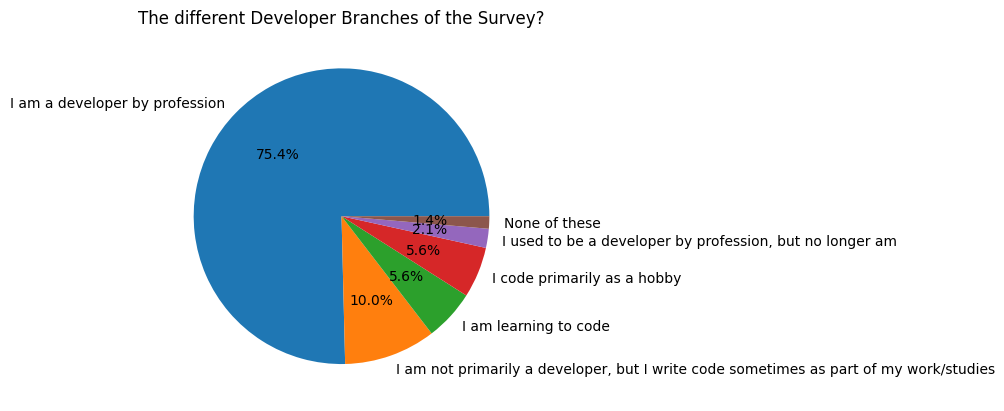

In [10]:
# STEP-1: Create a subset of the dataset containing only professional developers.
#         We use the question "_ID2/MainBranch/Which of the following Developer Branches best describes you today?_". 
df_developers = df[df['MainBranch'] == 'I am a developer by profession']
developers_by_profession = df_developers.shape[0]

# STEP-2: Print summary
print(f"[OUTCOME] Our investigation will solely focus on the population of \'developers by profession\' who are {developers_by_profession} and represent {(100*developers_by_profession/respondents):.1f}% of the respondents.")

# STEP-3: Display the pie chart
if VERBOSE > 1:
    print()
    print(df.MainBranch.value_counts())
pie_chart(df.MainBranch.value_counts(), "The different Developer Branches of the Survey", savefig=False)

### 3.2- Refining the statistical population per employment
The survey collects responses from people having various employment status.
This study will skip the full-time students and will solely focus on the **employed developers**.

[OUTCOME] Our investigation will solely focus on the population of 'active developers by profession' who are 62746 and represent 70.4% of the respondents.


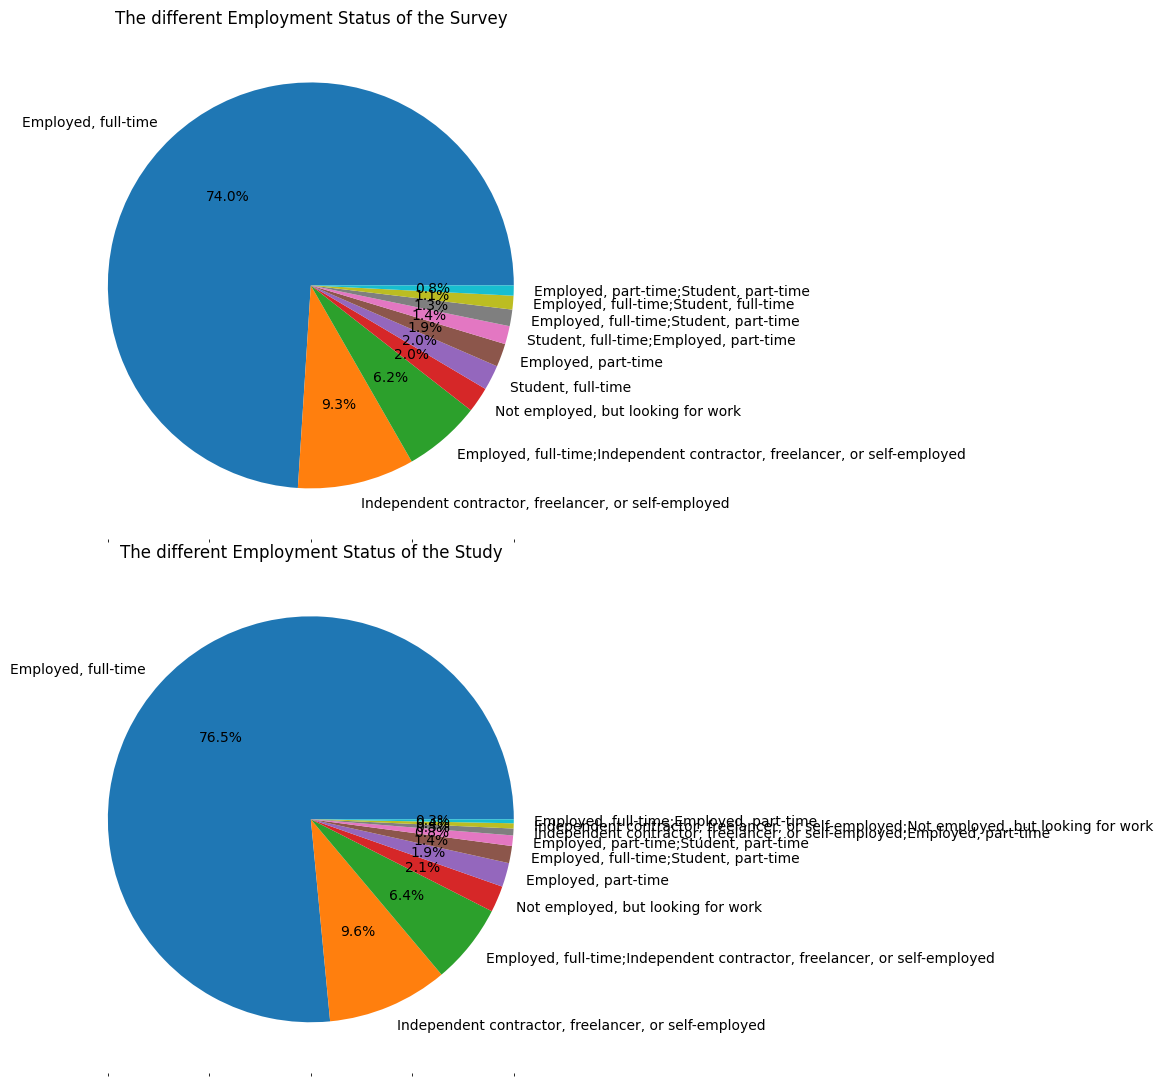

In [16]:
# STEP-1: Create a subset of the dataset containing only professional developers who are employed.
#         We use the question "_ID296/Employment/Which of the following best describes your current employment status?_".
df_active_developers = df_developers[~(df_developers['Employment'].str.contains('Student, full-time') |
                                       df_developers['Employment'].str.contains('Not employed, and not looking for work') | 
                                       df_developers['Employment'].str.contains('I prefer not to say'))]
# Futher remove a few employment status
df_active_developers = df_active_developers[~df_active_developers['Employment'].isin(['Student, part-time',
                                                                                       'Retired'])]
active_developers = df_active_developers.shape[0]

# STEP-2: Print summary
print(f"[OUTCOME] Our investigation will solely focus on the population of \'active developers by profession\' who are {active_developers} and represent {(100*active_developers/respondents):.1f}% of the respondents.")

# STEP-3: Display the pie charts
if VERBOSE > 1:
    print()
    print(df_active_developers.Employment.value_counts().head(30))
#pie_chart(df_developers.Employment.value_counts(),        'The different Employment Status of the Survey', savefig=False)
#pie_chart(df_active_developers.Employment.value_counts(), 'The different Employment Status of the Study',  savefig=False)

two_pie_chart(df_developers.Employment.value_counts(),        'The different Employment Status of the Survey', 
              df_active_developers.Employment.value_counts(), 'The different Employment Status of the Study',
              'col',
              'Refinement of statistical population per Employment Status', savefig=False)

### QID296 - Employment - Which of the following best describes your current **Employment Status**?

Employment
Employed, full-time                                                                                           53748
Student, full-time                                                                                             7430
Independent contractor, freelancer, or self-employed                                                           7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                       4354
Not employed, but looking for work                                                                             2553
Employed, part-time                                                                                            1644
Student, full-time;Employed, part-time                                                                         1392
Employed, full-time;Student, part-time                                                                         1028
Employed, full-time;Student, full-time                       

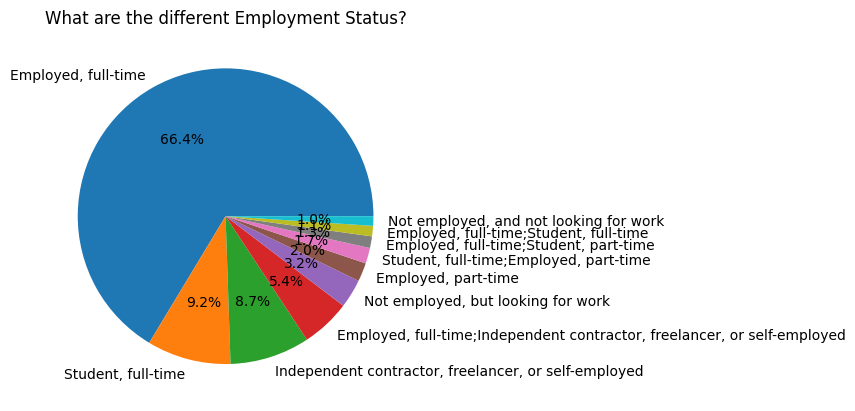

In [7]:
s_employment = df.Employment
if VERBOSE > 0:
    print(s_employment.value_counts().head(30))
pie_chart(s_employment.value_counts(), 'What are the different Employment Status?', savefig=False)

In [ ]:
active_developers = s_employment.value_counts()['Employed, full-time'] + \
                    s_employment.value_counts()['Independent contractor, freelancer, or self-employed'] + \
                    s_employment.value_counts()['Employed, full-time;Independent contractor, freelancer, or self-employed'] + \
                    s_employment.value_counts()['Not employed, but looking for work'] + \
                    s_employment.value_counts()['Employed, part-time']
print(f"OUTCOME-QID296: Our investigation will skip the students and the unemployed developers who are not looking for work. \n\tThe remaining active developers are {active_developers} and represent {(100*active_developers/num_rows):.1f}% of the survey answers.")
if active_developers > developers_by_profession:
    print(f"OUTCOME-QID296: \n\tWARNING: The number of active developers ({active_developers}) is higher than the number of developers by profession ({developers_by_profession}).") 
    

In [ ]:


X = sal_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]

# Find columns with missing values
# columns_with_missing_values = df.isnull().sum() > 0

# Filter the DataFrame to get only columns with missing values
# columns_with_missing_values = columns_with_missing_values[columns_with_missing_values].index

# Print the columns with missing values
# print(columns_with_missing_values)


In [ ]:
# df2 = df.isnull().mean()
# print(f"The proportion of missing values in each column is: \n{df2}\n")

# no_nulls = set(df.columns[df.isnull().mean()==0]) 
# print(f"The set of columns with 0 missing values is: \n{no_nulls}\n")

In [ ]:
# most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
# print(f"The set of columns with more than 75% of the values missing is: \n{most_missing_cols}\n")

In [ ]:
# Note: The value_counts() function is a convenient method in pandas 
#  that returns a Series containing counts of unique values in a column.
#  It counts the number of occurrences of each unique value in the 
#  specified column and returns the result in descending order.

status_vals = df.Professional.value_counts()
print(f"The pandas series of the counts for each Professional status is: \n{status_vals}\n")

print(f"The number of respondents in DataFrame \'df\' is: {df.shape[0]}")

# The below should be a bar chart of the proportion of individuals in
# each professional category if your status_vals is set up correctly.
colors = ['orange', 'green', 'blue', 'yellow', 'red']
(status_vals/df.shape[0]).plot(kind="bar", color=colors);
plt.title("What kind of developer are you?");

### Question 5

**5.** Provide a pandas series of the different **FormalEducation** status values in the dataset.  Store this pandas series in **ed_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

In [ ]:
ed_vals = df.FormalEducation.value_counts()
print(f"The repartition of the respondents per FormalEducation is: \n{ed_vals}\n")

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.
(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

### Question 6

**6.** Provide a pandas series of the different **Country** values in the dataset.  Store this pandas series in **count_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

In [ ]:
count_vals = df.Country.value_counts()
print(f"The repartition of the respondents per Country is: \n{count_vals}\n")

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.
(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

Feel free to explore the dataset further to gain additional familiarity with the columns and rows in the dataset.  You will be working pretty closely with this dataset throughout this lesson.

In [ ]:
#pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])
#pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')"))
